Run the block below to import all of the packages that are required for this Jupyter Notebook
If you are missing a package, simply run '!pip install {name of package}'.

Imports required:
qsharp: Will allow for compiling of Q# code
qsharp.azure: Provide the connection to Micosoft Azure Quantum account for running/retrieving jobs on/from the Micosoft Resource Estimator
matplotlib, numpy, json: used for analyzing and plotting data

"From WindowedArithmetic import EstimateWindowResouces" : in this line, WindowedArithmetic is the name of the Q# workspace and EsimateWindowResources is the Q# function we are importing from that workspace. (Make sure this code is in the same folder as the Q# code.)

In [ ]:
import qsharp
import pandas as pd
import qsharp.azure
import matplotlib.pyplot as plt
import numpy as np
import json
import matplotlib
import matplotlib.ticker as ticker

# This is the Q# code that we are importing
from WindowedArithmetic import EstimateWindowResources

In [ ]:
#Install packages: If you are missing a package, replace package_name with the package you are missing and run this block.

!pip install package_name

^C


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Sanskriti\AppData\Local\Temp\pip-install-ai_bd9xq\package_123bb5ae09bc4046b71621dc9a276082\setup.py", line 4
          print """
          ^^^^^^^^^
      SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)?
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


  Using cached package-0.1.1.tar.gz (13 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In the block below, using the resource ID and the location of your Azure account to connect it to Azure Quantum.

In [ ]:
# Input your connection infomation below
targets = qsharp.azure.connect(
    resourceId="resourceID",
    location='West Us'
)

# print(targets)

qsharp.azure.target("microsoft.estimator")

Connecting to Azure Quantum...

Connected to Azure Quantum workspace ArithmaticPrimitives in location westus.
Loading package Microsoft.Quantum.Providers.Core and dependencies...
Active target is now microsoft.estimator


{'id': 'microsoft.estimator', 'current_availability': {}, 'average_queue_time': 0}

In [ ]:
# Submit the jobs to Azure and collect the job_ids so you can access the results later.

job_dict = {} # Create a dictonary to hold all the job_ids
count = [10,10,10,10,10,9,9,8,7,6,5,5,4,4,4,4,3,3,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#The count array should be the same length as the bit_vals_input array
bit_vals_input = [8,9,10,11,12,13,14,16,18,20,22,24,26,28,30,32,36,40,44,48,52,56,60,64,72,80,88,96,104,112,120,128,144,160,176,192,208,224,240,256,288,320,352,384,416,448,480,512,576,640,704,768,832,896,960,1024,1152,1280,1408,1536,1664,1794,1920,2028,2304,2560,2816,3072,3328,3584,3840] #set the bit values here

t_size = '2*i' # Can run with different window sizes (sets the length of the lookup table)

# Loop over the range of multiplication values
for j in [1,2,3]:
    print(j)
    for i in range(len(bit_vals_input)):
        # Run the resource estimation on the cloud for this element value count[i] number of times
        counter = count[i]
        while(counter > 0):
            jobname = 'error'
            if j == 1: #to submit a windowed job
                jobname = 'windowed_' + t_size + '_' + str(bit_vals_input[i]) + '_' + str(count[i]) + '_' + str(counter)
            elif j == 2: #to submit a schoolbook job
                jobname = 'schoolbook_' + t_size + '_' + str(bit_vals_input[i]) + '_' + str(count[i]) + '_' + str(counter)
            elif j == 3: #to submit a karatsuba job
                jobname = 'karatsuba_' + t_size + '_' + str(bit_vals_input[i]) + '_' + str(count[i]) + '_' + str(counter)
            else:
                print("error!!!!")
            
            job = qsharp.azure.submit(EstimateWindowResources, method=j, n = bit_vals_input[i], timeout=6000, jobName=jobname)
            job_dict[jobname] = job.id

            counter = counter - 1

#print(job_dict) #prints the job dictonary at the end


1
Submitting WindowedArithmetic.EstimateWindowResources to target microsoft.estimator...
Job successfully submitted.
   Job name: windowed_2*i_8_1_1
   Job ID: 1e0726a9-f48e-44d9-a8f4-8ca4b43db807
Submitting WindowedArithmetic.EstimateWindowResources to target microsoft.estimator...
Job successfully submitted.
   Job name: windowed_2*i_9_1_1
   Job ID: 32c81030-2ece-4f41-81f6-a3f4ee0c4f1c
Submitting WindowedArithmetic.EstimateWindowResources to target microsoft.estimator...
Job successfully submitted.
   Job name: windowed_2*i_10_1_1
   Job ID: af3dd640-8555-44a8-9def-142a051e926c
Submitting WindowedArithmetic.EstimateWindowResources to target microsoft.estimator...
Job successfully submitted.
   Job name: windowed_2*i_11_1_1
   Job ID: 951b6b01-5675-4761-89cb-c2757494c804
Submitting WindowedArithmetic.EstimateWindowResources to target microsoft.estimator...
Job successfully submitted.
   Job name: windowed_2*i_12_1_1
   Job ID: ee2afb3d-0cfc-4c6e-a3ad-487f427495cb
Submitting WindowedA

In [ ]:
#to save the job dict to a file so you dont have to collect on your own
json.dump(job_dict, open("jobdict_testnum_rand.txt", 'w'))

In [ ]:
#only run this block if you want to upload a job dict, it will overwrite the current job_dict

#job_dict = json.load(open("jobdict_testnum_rand.txt"))


The code belows uses the name of the job to sort the output fron the job into the correct array. The job id is used to get the data from the Azure Quantum Workspace, so it does not have to all be stored on this end.

In [ ]:
w_physical_qubits_arr = np.zeros(int(len(job_dict.keys())/3))
w_logical_qubits_arr = np.zeros(int(len(job_dict.keys())/3))
w_cczgates_arr = np.zeros(int(len(job_dict.keys())/3))
s_physical_qubits_arr = np.zeros(int(len(job_dict.keys())/3))
s_logical_qubits_arr = np.zeros(int(len(job_dict.keys())/3))
s_cczgates_arr = np.zeros(int(len(job_dict.keys())/3))
k_physical_qubits_arr = np.zeros(int(len(job_dict.keys())/3))
k_logical_qubits_arr = np.zeros(int(len(job_dict.keys())/3))
k_cczgates_arr = np.zeros(int(len(job_dict.keys())/3))

w_tstates = np.zeros(int(len(job_dict.keys())/3))
s_tstates = np.zeros(int(len(job_dict.keys())/3))
k_tstates = np.zeros(int(len(job_dict.keys())/3))

bit_vals_post = []

for i in job_dict.keys():

    l = int(i.split('_')[2])
    if(bit_vals_post.count(l) == 0):
        bit_vals_post.append(l)
    
    ind = bit_vals_post.index(l)

    c =  int(i.split('_')[3])
    #print(c)
    #c = 1

    while(qsharp.azure.status(job_dict[i]).status == 'Waiting'):
        print(".")
    if qsharp.azure.status(job_dict[i]).status == 'Succeeded':
        result = qsharp.azure.output(str(job_dict[i]))
        if(str(i)[0] == 'w'):
            w_physical_qubits_arr[ind] += result['physicalCounts']['breakdown']['physicalQubitsForAlgorithm']/(l*c) #scales the physcial qubit count by input bit size l
            w_logical_qubits_arr[ind] += result['physicalCounts']['breakdown']['algorithmicLogicalQubits']/(l*c) #scales the logical qubit count by input bit size l
            w_cczgates_arr[ind] += result['logicalCounts']['cczCount']/(l*c*l) #scales the toffoli gate count by input bit size l^2
            w_tstates[ind] += result['physicalCounts']['breakdown']['numTstates'] #no scaling here
        elif(str(i)[0] == 's'):
            s_physical_qubits_arr[ind] += result['physicalCounts']['breakdown']['physicalQubitsForAlgorithm']/(l*c)
            s_logical_qubits_arr[ind] += result['physicalCounts']['breakdown']['algorithmicLogicalQubits']/(l*c)
            s_cczgates_arr[ind] += result['logicalCounts']['cczCount']/(l*c*l)
            s_tstates[ind] += result['physicalCounts']['breakdown']['numTstates']
        elif(str(i)[0] == 'k'):
            k_physical_qubits_arr[ind] += result['physicalCounts']['breakdown']['physicalQubitsForAlgorithm']/(l*c)
            k_logical_qubits_arr[ind] += result['physicalCounts']['breakdown']['algorithmicLogicalQubits']/(l*c)
            k_cczgates_arr[ind] += result['logicalCounts']['cczCount']/(l*c*l)
            k_tstates[ind] += result['physicalCounts']['breakdown']['numTstates']

    else:
        print(qsharp.azure.status(job_dict[i]).status)


39546, 117, 270
43264, 128, 330
62550, 139, 396
67500, 150, 468
72450, 161, 546
77400, 172, 630
81900, 182, 720
92700, 206, 550
102600, 228, 672
112050, 249, 806
121500, 270, 952
131400, 292, 1110
140850, 313, 1280
150300, 334, 1462
205190, 355, 1656
170100, 378, 1408
242760, 420, 1770
267036, 462, 2098
291312, 504, 2460
315588, 546, 2934
339864, 588, 3350
364140, 630, 3800
387838, 671, 4386
413270, 715, 4262
461244, 798, 5226
636082, 881, 6286
696008, 964, 7442
755212, 1046, 8694
815138, 1129, 10042
874342, 1211, 11486
933546, 1293, 13026
994916, 1378, 13274
1113324, 1542, 16298
1231732, 1706, 19878
1350140, 1870, 23468
1793988, 2034, 27360
1937754, 2197, 31562
2082402, 2361, 36090
2226168, 2524, 41334
2371698, 2689, 43990
2659230, 3015, 54534
2946762, 3341, 65440
3234294, 3667, 77398
3520944, 3992, 91142
3807594, 4317, 105056
4911236, 4642, 120022
5254028, 4966, 136966
5599994, 5293, 150982
6286636, 5942, 185440
6972220, 6590, 223388
7657804, 7238, 264842
8342330, 7885, 309834
902685

The plots for the physical qubits, logical qubits and toffoli gate counts below:

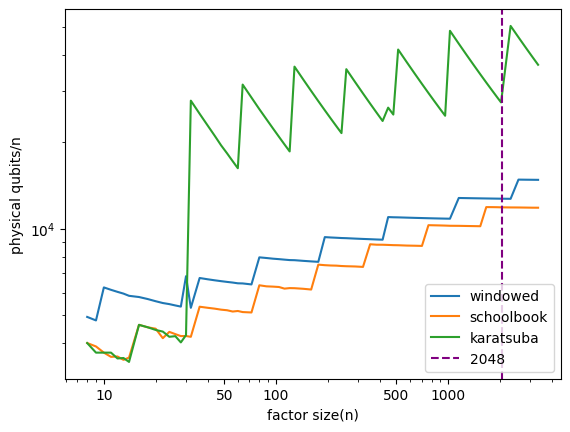

In [ ]:
fig1, ax1 = plt.subplots()
ax1.plot(bit_vals_post[:-2], w_physical_qubits_arr[:-2], label='windowed')
ax1.plot(bit_vals_post[:-2], s_physical_qubits_arr[:-2], label='schoolbook')
ax1.plot(bit_vals_post[:-2], k_physical_qubits_arr[:-2], label='karatsuba')
ax1.axvline(x = 2048, label = '2048', color = 'purple', linestyle= 'dashed')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks([10,50, 100,500, 1000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('factor size(n)')
plt.ylabel('physical qubits/n')
plt.legend()

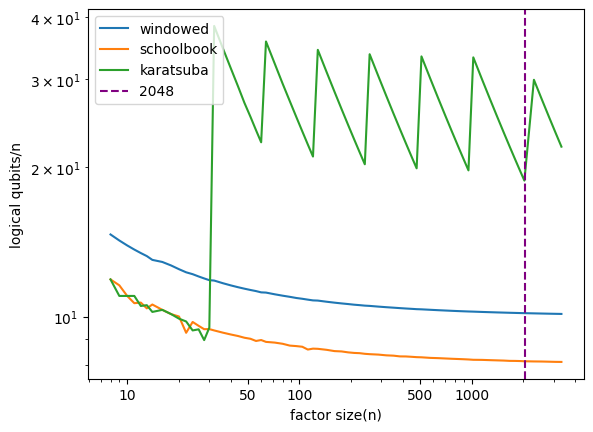

In [ ]:
fig1, ax1 = plt.subplots()
ax1.plot(bit_vals_post[:-2], w_logical_qubits_arr[:-2], label='windowed')
ax1.plot(bit_vals_post[:-2], s_logical_qubits_arr[:-2], label='schoolbook')
ax1.plot(bit_vals_post[:-2], k_logical_qubits_arr[:-2], label='karatsuba')
ax1.axvline(x = 2048, label = '2048', color = 'purple', linestyle= 'dashed')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks([10,50, 100,500, 1000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('factor size(n)')
plt.ylabel('logical qubits/n')
plt.legend()


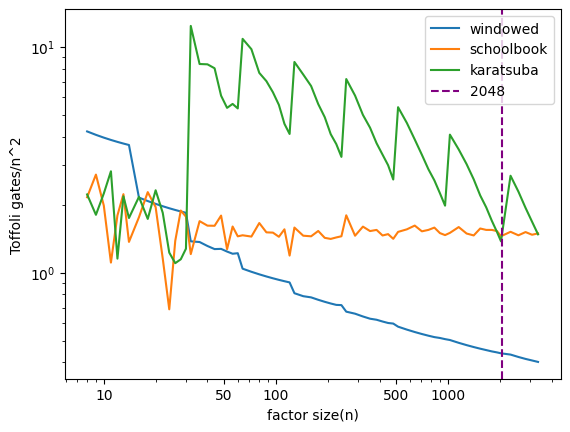

In [ ]:
fig1, ax1 = plt.subplots()
ax1.plot(bit_vals_post[:-2], w_tstates_arr[:-2], label='windowed')
ax1.plot(bit_vals_post[:-2], s_tstates_arr[:-2], label='schoolbook')
ax1.plot(bit_vals_post[:-2], k_tstates_arr[:-2], label='karatsuba')
ax1.axvline(x = 2048, label = '2048', color = 'purple', linestyle= 'dashed')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks([10,50, 100,500, 1000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('factor size(n)')
plt.ylabel('Toffoli gates/n^2')
plt.legend()

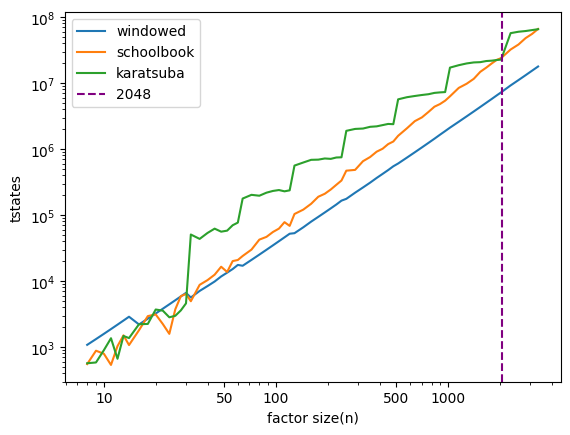

In [ ]:
fig1, ax1 = plt.subplots()
ax1.plot(bit_vals_post[:-2], w_tstates[:-2], label='windowed')
ax1.plot(bit_vals_post[:-2], s_tstates[:-2], label='schoolbook')
ax1.plot(bit_vals_post[:-2], k_tstates[:-2], label='karatsuba')
ax1.axvline(x = 2048, label = '2048', color = 'purple', linestyle= 'dashed')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks([10,50, 100,500, 1000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('factor size(n)')
plt.ylabel('tstates')
plt.legend()

Run the blocks below to save the data to a csv file

In [ ]:
import csv

with open("bitval_wsk_tstates_final.csv", 'w') as file:
    fw = csv.writer(file)
    for v in range(len(bit_vals_post[:-1])):
        fw.writerow([bit_vals_post[v], w_tstates[v],s_tstates[v],k_tstates[v]])



In [ ]:
#to save data
import csv

with open("bitval_wsk_logical_qubits_final.csv", 'w') as file:
    fw = csv.writer(file)
    for v in range(len(bit_vals_post[:-1])):
        fw.writerow([bit_vals_post[v], w_logical_qubits_arr[v],s_logical_qubits_arr[v],k_logical_qubits_arr[v]])





In [ ]:
import csv

with open("bitval_wsk_cczCount_final.csv", 'w') as file:
    fw = csv.writer(file)
    for v in range(len(bit_vals_post[:-2])):
        fw.writerow([bit_vals_post[v], w_tstates_arr[v],s_tstates_arr[v],k_tstates_arr[v]])



with open("bitval_wsk_physical_qubits_final.csv", 'w') as file:
    fw = csv.writer(file)
    for v in range(len(bit_vals_post[:-2])):
        fw.writerow([bit_vals_post[v], w_physical_qubits_arr[v],s_physical_qubits_arr[v],k_physical_qubits_arr[v]])





The below code submits jobs to Azzure Quantum with job parameters: currently the different types of qubits, and qubits with different error parameters.

In [ ]:
job_dict = {}

n = 2028

t_size = '2*i' #string
# Loop over the range of multiplication values defined in the operation

qubit_types = ["qubit_gate_ns_e3","qubit_gate_ns_e4","qubit_gate_us_e3","qubit_gate_us_e4","qubit_maj_ns_e4","qubit_maj_ns_e6"]

for j in [1,2,3]:
    print(j)
    for i in range(len(qubit_types)):
        # Run the resource estimation on the cloud for this element value
        jobparams={
            "qubitParams": {
                "name": qubit_types[i]
            }
        }
        if j == 1:
            jobname = 'windowed_' + t_size + '_' + str(n) + "_" + qubit_types[i]
        elif j == 2:
            jobname = 'schoolbook_' + t_size + '_' + str(n) + "_" + qubit_types[i]
        elif j == 3:
            jobname = 'karatsuba_' + t_size + '_' + str(n) + "_" + qubit_types[i]
        else:
            print("error!!!!")
        
        job = qsharp.azure.submit(EstimateWindowResources, method=j, n = n, timeout=6000, jobName=jobname, jobParams=jobparams)
        job_dict[jobname] = job.id



1
Submitting WindowedArithmetic.EstimateWindowResources to target microsoft.estimator...
Job successfully submitted.
   Job name: windowed_2*i_2028_qubit_gate_ns_e3
   Job ID: ff72f8d9-d3be-44e6-bde2-2c1be5b2d8be
Submitting WindowedArithmetic.EstimateWindowResources to target microsoft.estimator...
Job successfully submitted.
   Job name: windowed_2*i_2028_qubit_gate_ns_e4
   Job ID: 7cc80a34-8350-45f7-8d5f-dc1c1a673f5c
Submitting WindowedArithmetic.EstimateWindowResources to target microsoft.estimator...
Job successfully submitted.
   Job name: windowed_2*i_2028_qubit_gate_us_e3
   Job ID: 2d4f87ca-a5ed-4038-a0cb-b280423fa55d
Submitting WindowedArithmetic.EstimateWindowResources to target microsoft.estimator...
Job successfully submitted.
   Job name: windowed_2*i_2028_qubit_gate_us_e4
   Job ID: 1dd58254-fb47-41ec-85b8-1c1fdb89d520
Submitting WindowedArithmetic.EstimateWindowResources to target microsoft.estimator...
Job successfully submitted.
   Job name: windowed_2*i_2028_qubit_ma

The results are taken from azure quantum and then the physical qubits counts and the runtime are extracted from each result.

In [ ]:
physical_qubits = []
runtime = []

w_physical_qubits = []
w_runtime = []
k_physical_qubits = []
k_runtime = []
s_physical_qubits = []
s_runtime = []

qubit_types_arr = []
algo = []

for i in job_dict.keys():

    qubit_types_arr.append(str(i.split('_')[3]))

    while(qsharp.azure.status(job_dict[i]).status == 'Waiting'):
        print(".")
    if qsharp.azure.status(job_dict[i]).status == 'Succeeded':
        result = qsharp.azure.output(str(job_dict[i]))
        if(str(i)[0] == 'w'):
            physical_qubits.append(result['physicalCounts']['breakdown']['physicalQubitsForAlgorithm'])
            runtime.append(result['physicalCounts']['runtime'])
            w_physical_qubits.append(result['physicalCounts']['breakdown']['physicalQubitsForAlgorithm'])
            w_runtime.append(result['physicalCounts']['runtime'])
        elif(str(i)[0] == 's'):
            physical_qubits.append(result['physicalCounts']['breakdown']['physicalQubitsForAlgorithm'])
            runtime.append(result['physicalCounts']['runtime'])
            s_physical_qubits.append(result['physicalCounts']['breakdown']['physicalQubitsForAlgorithm'])
            s_runtime.append(result['physicalCounts']['runtime'])
        elif(str(i)[0] == 'k'):
            physical_qubits.append(result['physicalCounts']['breakdown']['physicalQubitsForAlgorithm'])
            runtime.append(result['physicalCounts']['runtime'])
            k_physical_qubits.append(result['physicalCounts']['breakdown']['physicalQubitsForAlgorithm'])
            k_runtime.append(result['physicalCounts']['runtime'])
    else:
        print(qsharp.azure.status(job_dict[i]).status)


qubit_gate_ns_e3
w
qubit_gate_ns_e4
w
qubit_gate_us_e3
w
qubit_gate_us_e4
w
qubit_maj_ns_e4
w
qubit_maj_ns_e6
w
qubit_gate_ns_e3
s
qubit_gate_ns_e4
s
qubit_gate_us_e3
s
qubit_gate_us_e4
s
qubit_maj_ns_e4
s
qubit_maj_ns_e6
s
qubit_gate_ns_e3
k
qubit_gate_ns_e4
k
qubit_gate_us_e3
k
qubit_gate_us_e4
k
qubit_maj_ns_e4
k
qubit_maj_ns_e6
k


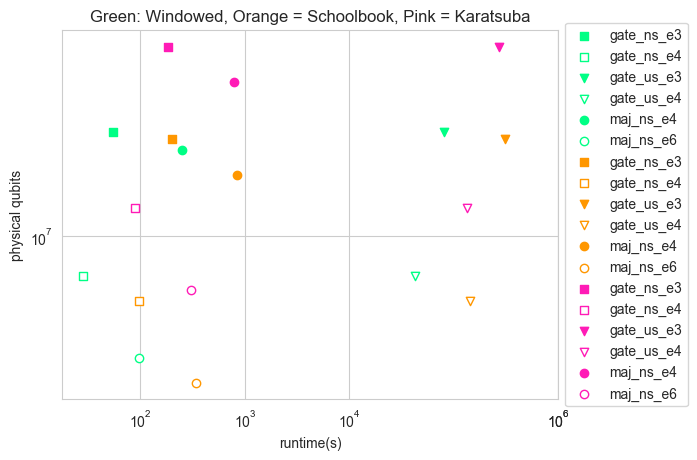

In [ ]:
#Plot the results
qubit_types = ["qubit_gate_ns_e3","qubit_gate_ns_e4","qubit_gate_us_e3","qubit_gate_us_e4","qubit_maj_ns_e4","qubit_maj_ns_e6"]

fig1, ax1 = plt.subplots()

qubit_type = ""
algo = ""

wc = '#00ff85' #green
sc = '#ff9700' #orange
kc = '#ff1bb6' #pink

wcl = '#81ffb4'
scl = '#ffc680'
kcl = '#ffaadc'

for i in range(len(job_dict.keys())):
    qubit_type = "_".join(list(job_dict.keys())[i].split('_')[3:7])
    print(qubit_type)
    algo = list(job_dict.keys())[i].split('_')[0][0]
    print(algo)
    if(qubit_type == "qubit_gate_ns_e3"):
        if (algo == "w"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c= wc, label = qubit_type[6:], marker = "s")
        elif (algo =="s"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c= sc, label = qubit_type[6:], marker = "s")
        elif (algo == "k"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c= kc, label = qubit_type[6:], marker = "s")

    elif(qubit_type == "qubit_gate_ns_e4"):
        if (algo == "w"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c = 'white', label = qubit_type[6:], marker = "s", edgecolors = wc)
        elif (algo == "s"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c = 'white', label = qubit_type[6:], marker = "s", edgecolors = sc)
        elif (algo =="k"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c = 'white', label = qubit_type[6:], marker = "s", edgecolors = kc)

    elif(qubit_type == "qubit_gate_us_e3"):
        if (algo == "w"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c= wc, label = qubit_type[6:], marker = "v")
        elif (algo == "s"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c= sc, label = qubit_type[6:], marker = "v")
        elif (algo == "k"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c= kc, label = qubit_type[6:], marker = "v")

    elif(qubit_type == "qubit_gate_us_e4"):
        if (algo == "w"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c = 'white', label = qubit_type[6:], marker = "v", edgecolors = wc)
        elif (algo == "s"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c = 'white', label = qubit_type[6:], marker = "v", edgecolors = sc)
        elif (algo == "k"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c = 'white', label = qubit_type[6:], marker = "v", edgecolors = kc)

    elif(qubit_type == "qubit_maj_ns_e4"):
        if (algo == "w"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c= wc, label = qubit_type[6:], marker = "o")
        elif (algo == "s"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c= sc, label = qubit_type[6:], marker = "o")
        elif (algo == "k"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c= kc, label = qubit_type[6:], marker = "o")

    elif(qubit_type == "qubit_maj_ns_e6"):
        if (algo == "w"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c = 'white', label = qubit_type[6:], marker = "o", edgecolors = wc)
        elif (algo == "s"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c = 'white', label = qubit_type[6:], marker = "o", edgecolors = sc)
        elif (algo == "k"):
            ax1.scatter(runtime[i]*1e-9, physical_qubits[i], c = 'white', label = qubit_type[6:], marker = "o", edgecolors = kc)

#ax1.plot(w_runtime, w_physical_qubits, c= wcl)
#to sort points: https://stackoverflow.com/questions/10846431/ordering-shuffled-points-that-can-be-joined-to-form-a-polygon-in-python

plt.title("Green: Windowed, Orange = Schoolbook, Pink = Karatsuba")
plt.xlabel('runtime(s)')
plt.ylabel('physical qubits')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks([100,1000, 10000, 1000000, 1000000])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
#save the job dict for this qubit type data
json.dump(job_dict, open("jobdict_scatter.txt", 'w'))